In [156]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd

df_train = pd.read_csv("data-logistic.csv", header=None)

Populating the interactive namespace from numpy and matplotlib


Logistic regression functional to minimize:

<img src="logreg.png">

Derivatives:

<img src="logderiv.png">
<img src="logderiv2.png">

Обратите внимание, что мы используем полноценный градиентный спуск, а не его стохастический вариант!
Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0). Запустите градиентный спуск и доведите до сходимости (евклидово расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5). Рекомендуется ограничить сверху число итераций десятью тысячами.

In [188]:
class GradientDecent(object):
    def __init__(self, data, k=0.1, w_init=(0, 0)):
        self.x1 = data[1]
        self.x2 = data[2]
        self.y = data[0]
        self.l = float(len(self.y.index))
        self.w1, self.w2 = w_init
        self.C = 10
        self.k = k

    def exp(self):
        return np.exp(-self.y*(self.w1*self.x1 + self.w2*self.x2))
    
    def goal_function(self):
        return (1/self.l)*np.sum(np.log(1 + self.exp()))

    def goal_function_reg(self):
        return self.goal_function() + 0.5*self.C*(np.linalg.norm([self.w1, self.w2])**2)

    def derivative_exp(self):
        return 1 - 1/(1 + self.exp())
    
    def derivative(self, x):
        return self.k*(1/self.l)*np.sum(self.y*x*self.derivative_exp())

    def derivative1(self):
        return self.w1 + self.derivative(self.x1)
    
    def derivative1_reg(self):
        return self.derivative1() - self.k*self.C*self.w1

    def derivative2(self):
        return self.w2 + self.derivative(self.x2)
    
    def derivative2_reg(self):
        return self.derivative2() - self.k*self.C*self.w2

    def sigma(self):
        return 1/(1 + np.exp(- self.w1*self.x1 - self.w2*self.x2))
    
    def run_(self, derivate_function1, derivate_function2, goal_function):
        LIMIT = 1.0e-5
        ITERATIONS = 10000
        new_w1 = derivate_function1()
        new_w2 = derivate_function2()
        goal = []
        i = 0
        while abs(self.w1 - new_w1) > LIMIT and abs(self.w2 - new_w2) > LIMIT and i < ITERATIONS:
            goal.append(goal_function())
            self.w1 = new_w1
            self.w2 = new_w2
            new_w1 = derivate_function1()
            new_w2 = derivate_function2()
            i += 1
        self.w1 = derivate_function1()
        self.w2 = derivate_function2()
        plt.plot(goal)
        plt.show()
    
    def run(self):
        run_(self, self.derivative1, self.derivative2, self.goal_function)

    def run_reg(self):
        run_(self, self.derivative1_reg, self.derivative2_reg, self.goal_function_reg)
    

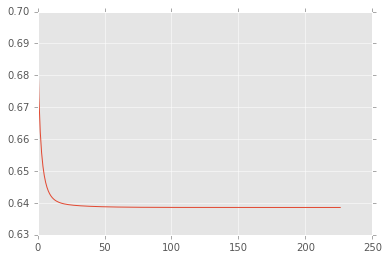

In [189]:
GradientDecent(df_train).run()

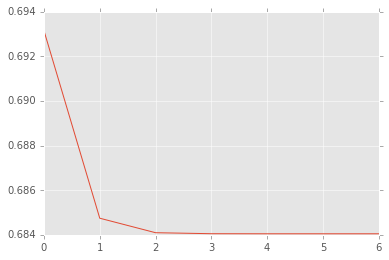

In [190]:
GradientDecent(df_train).run_reg()

Попробуйте поменять длину шага. Будет ли сходиться алгоритм, если делать более длинные шаги? Как меняется число итераций при уменьшении длины шага?

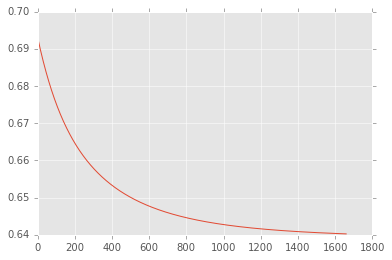

In [191]:
GradientDecent(df_train, k=0.001).run()

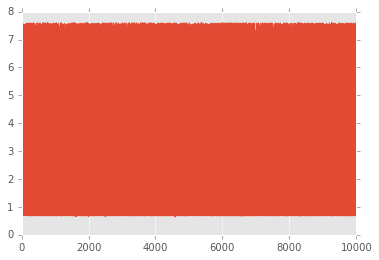

In [192]:
GradientDecent(df_train, k=10).run()

Попробуйте менять начальное приближение. Влияет ли оно на что-нибудь?

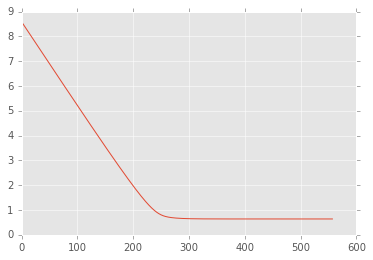

In [197]:
GradientDecent(df_train, w_init=(7, 13)).run()

Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? Эти величины будут ответом на задание. Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, подсчитанные обученным алгоритмом. Для этого воспользуйтесь сигмоидной функцией: a(x) = 1 / (1 + exp(-w1 x1 - w2 x2)).

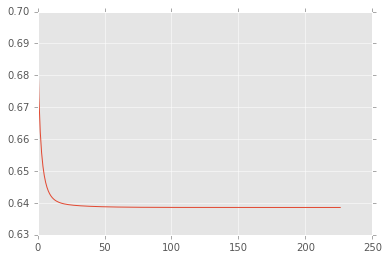

0.926857142857


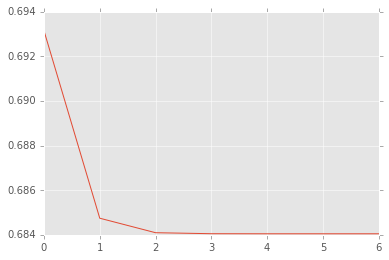

0.936285714286


In [193]:
from sklearn.metrics import roc_auc_score

gd = GradientDecent(df_train)
gd.run()
print roc_auc_score(df_train[0], gd.sigma())
gd = GradientDecent(df_train)
gd.run_reg()
print roc_auc_score(df_train[0], gd.sigma())

In [196]:
with open("submissions/3_3.txt", 'w') as f:
    f.write('0.927 0.936')